In [92]:
from ROOT import *
%jsroot off

fileName_rel = 'histodemo_pre3.root'
fileName_ref = 'histodemo_pre2.root'

histoPath="photonValidation"

fileRoot_rel = TFile(fileName_rel)
fileRoot_ref = TFile(fileName_ref)
histo_relPath = getHisto(fileRoot_rel,histoPath)
histo_refPath = getHisto(fileRoot_ref,histoPath)

Integral(1-1.5): 1966.0
Integral(0-1.): 3666.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file NHadrons_all.png has been created


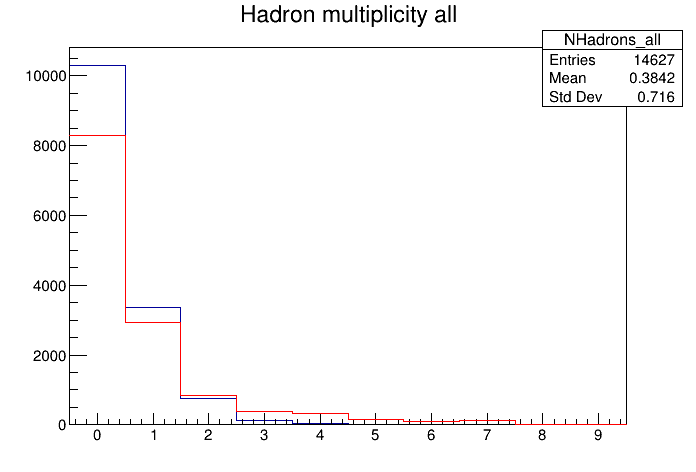

In [95]:
def getHisto(file, path):
    t_path = file.Get(path)
    return t_path 

def createHistoPicture(histo1,histo2,rescale=True):
    cnv = TCanvas("canvas")    
    histo2.SetLineColor(2)
    normalOrder = True
    if (rescale):
        normalOrder = (histo1.GetBinContent(histo1.GetMaximumBin()))/histo1.Integral() >  (histo2.GetBinContent(histo2.GetMaximumBin()))/histo2.Integral()
    else:
        normalOrder = (histo1.GetBinContent(histo1.GetMaximumBin())) >  (histo2.GetBinContent(histo2.GetMaximumBin()))
    
    
    if (normalOrder): 
        if (rescale):
            histo1.DrawNormalized()
            histo2.DrawNormalized("same")
        else:
            histo1.Draw()
            histo2.Draw("same")
    else:
        if (rescale):
            histo2.DrawNormalized()
            histo1.DrawNormalized("same")
        else:
            histo2.Draw()
            histo1.Draw("same")
    return cnv
   
def compareHisto(histoName, rescale=True):
    histo_rel = histo_relPath.Get(histoName)
    histo_ref = histo_refPath.Get(histoName)
    cnv = createHistoPicture(histo_ref,histo_rel,False)
    fileName=histoName+".png"
    cnv.Print(fileName)
    return cnv

    
#histoName='dRPhoPFcand_Barrel_EtaR'
#histoName='dRPhoPFcand_Barrel_Edge'
#histoName='dRPhoPFcand_all'
#histoName='EtaPhotonsBarrel'
#histoName='EtaPhotonsCheckEdge'
histoName='NHadrons_all'
canvas=compareHisto(histoName,'False')
canvas.Draw()

#histosToPrint=[['dRPhoPFcand_Barrel_EtaR',False],['dRPhoPFcand_Barrel_Edge',True],['NeutralHadronEta',False]]

#for i in histosToPrint:
#    compareHisto(i[0],i[1])



histoName='EtaPhotonsBarrel'
histo_rel = histo_relPath.Get(histoName)
bin0=histo_rel.GetXaxis().FindBin(0.)
bin1=histo_rel.GetXaxis().FindBin(1.)
bin2=histo_rel.GetXaxis().FindBin(1.5)
integralCentral=histo_rel.Integral(bin0,bin1)
integralEdge=histo_rel.Integral(bin1,bin2)
print("Integral(1-1.5): "+str(integralEdge))
print("Integral(0-1.): "+str(integralCentral))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


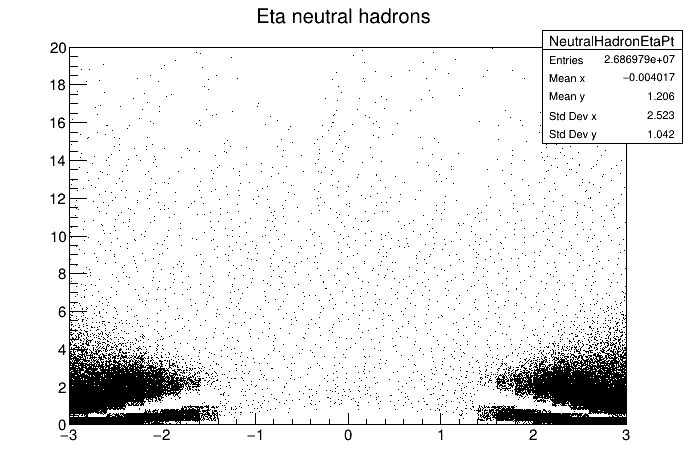

In [89]:

c2 = TCanvas("canvas")    
h2=histo_rel = histo_relPath.Get("NeutralHadronEtaPt")
h2.Draw()
c2.Draw()